In [12]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from skimage import io, color

import torch
from torch.utils.data  import Dataset, DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [13]:
# Specify the directory name
new_folder = 'img_png'

# Create the directory
os.makedirs(new_folder, exist_ok=True)

# Verify the creation
if os.path.isdir(new_folder):
    print(f"Folder '{new_folder}' created successfully!")
else:
    print(f"Failed to create the folder '{new_folder}'.")

Folder 'img_png' created successfully!


In [14]:
print("\nContents of the current directory:")
print(os.listdir('.'))


Contents of the current directory:
['img_png', '.virtual_documents']


In [15]:
from PIL import Image
import os

# Directory containing JPEG images
jpg_dir = '/kaggle/input/teeth-segmentation-on-dental-x-ray-images/Teeth Segmentation PNG/d2/img'

# Directory where PNG images will be saved
png_dir = '/kaggle/working/img_png'

# Create the PNG directory if it doesn't exist
os.makedirs(png_dir, exist_ok=True)

# List all JPEG files in the directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg') or f.endswith('.jpeg')]

# Iterate over each JPEG file and convert it to PNG
for jpg_file in jpg_files:
    # Open the JPEG image
    jpg_path = os.path.join(jpg_dir, jpg_file)
    image = Image.open(jpg_path)

    # Construct the corresponding PNG file path
    png_file = os.path.splitext(jpg_file)[0] + '.png'
    png_path = os.path.join(png_dir, png_file)

    # Convert and save the image as PNG
    image.save(png_path, 'PNG')
    print(f"Converted {jpg_file} to {png_file}")

Converted 208.jpg to 208.png
Converted 473.jpg to 473.png
Converted 333.jpg to 333.png
Converted 537.jpg to 537.png
Converted 45.jpg to 45.png
Converted 369.jpg to 369.png
Converted 56.jpg to 56.png
Converted 89.jpg to 89.png
Converted 20.jpg to 20.png
Converted 275.jpg to 275.png
Converted 212.jpg to 212.png
Converted 239.jpg to 239.png
Converted 58.jpg to 58.png
Converted 150.jpg to 150.png
Converted 6.jpg to 6.png
Converted 109.jpg to 109.png
Converted 149.jpg to 149.png
Converted 187.jpg to 187.png
Converted 521.jpg to 521.png
Converted 436.jpg to 436.png
Converted 76.jpg to 76.png
Converted 539.jpg to 539.png
Converted 355.jpg to 355.png
Converted 516.jpg to 516.png
Converted 71.jpg to 71.png
Converted 474.jpg to 474.png
Converted 501.jpg to 501.png
Converted 342.jpg to 342.png
Converted 429.jpg to 429.png
Converted 544.jpg to 544.png
Converted 377.jpg to 377.png
Converted 272.jpg to 272.png
Converted 270.jpg to 270.png
Converted 182.jpg to 182.png
Converted 215.jpg to 215.png
Con

In [16]:
folder_name = "mask_bw"

path = "/kaggle/working/" + folder_name

os.makedirs(path, exist_ok=True)

In [17]:
source_dir = '/kaggle/input/teeth-segmentation-on-dental-x-ray-images/Teeth Segmentation JSON/d2/masks_machine'
destination_dir = '/kaggle/working/mask_bw'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Function to convert an image to black and white
def convert_to_black_white(image_path, threshold=1):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    bw = image.point(lambda x: 0 if x < threshold else 255, '1')  # Apply threshold
    return bw

# Convert all images in the source directory
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
for filename in os.listdir(source_dir):
    if filename.lower().endswith(image_extensions):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)
        bw_image = convert_to_black_white(source_file)
        bw_image.save(destination_file)

In [18]:
def pre_images(resize_shape,path):
    img=Image.open(path)
    img=img.resize((resize_shape),Image.ANTIALIAS)
    img=convert_one_channel(np.asarray(img))
    cv2.imwrite(path,img)
    return img

def resize(resize_shape,path):
    img=Image.open(path)
    # w,h=np.array(img).shape
    # print(w,h)
      # print(img.size)
    img=img.resize((resize_shape),Image.ANTIALIAS)
    return img

/tmp/ipykernel_34/2551643299.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img1=ress1.resize((1540,640), Image.ANTIALIAS)
/tmp/ipykernel_34/2551643299.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img2=ress2.resize((1540,640), Image.ANTIALIAS)


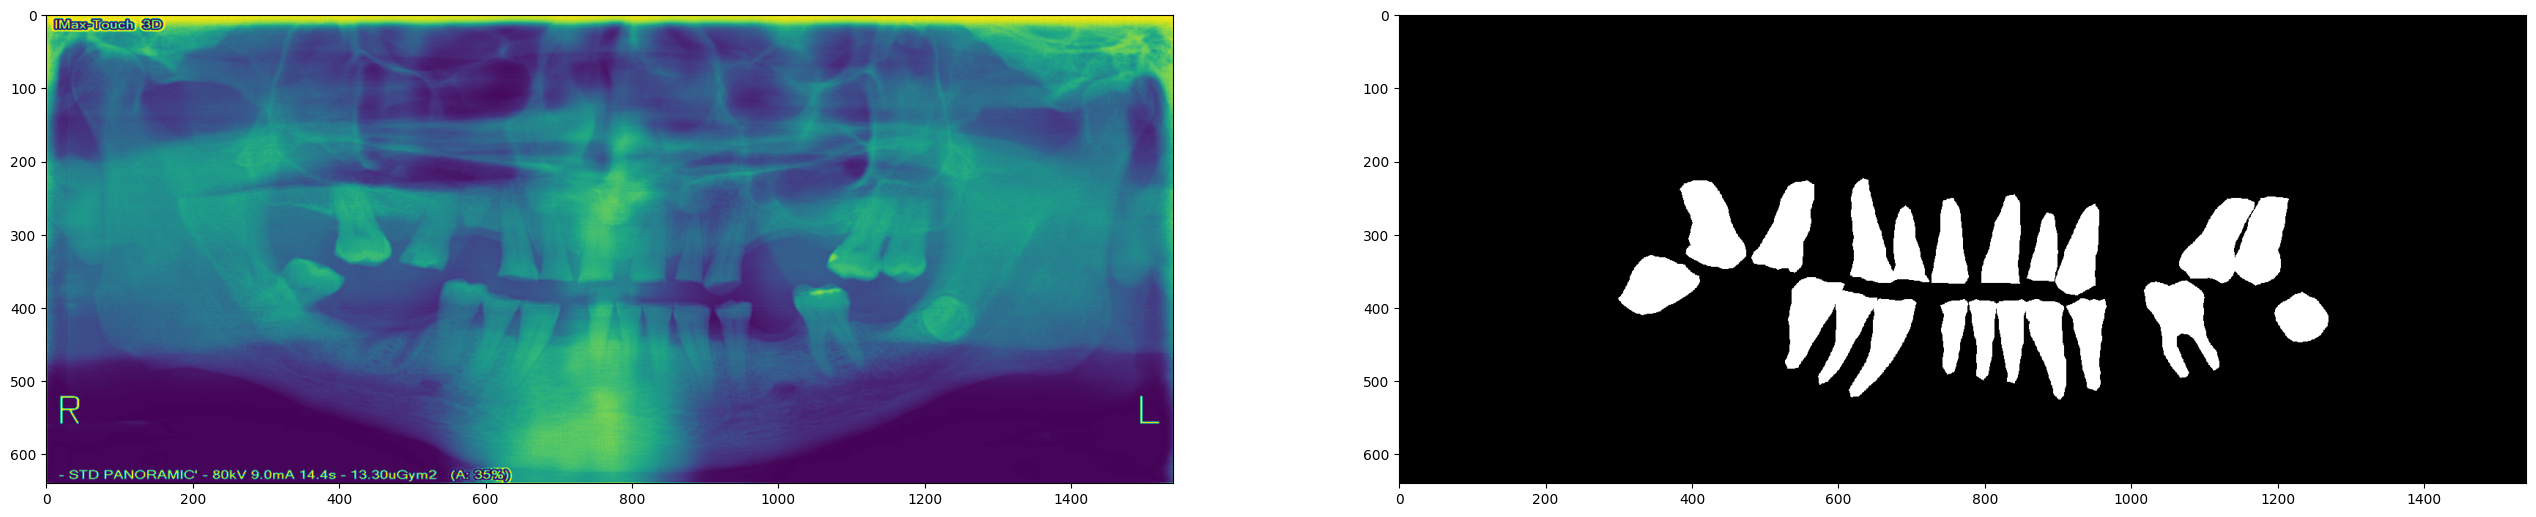

In [19]:
ress1=Image.open('/kaggle/working/img_png/1.png')
ress2=Image.open('/kaggle/working/mask_bw/1.png')
img1=ress1.resize((1540,640), Image.ANTIALIAS)
img2=ress2.resize((1540,640), Image.ANTIALIAS)

fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(2, 2, 1)
plt.imshow(img1)
ax = fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.show()

In [20]:
def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

/tmp/ipykernel_34/2546097768.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img=img.resize((resize_shape),Image.ANTIALIAS)
/tmp/ipykernel_34/2546097768.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img=img.resize((resize_shape),Image.ANTIALIAS)


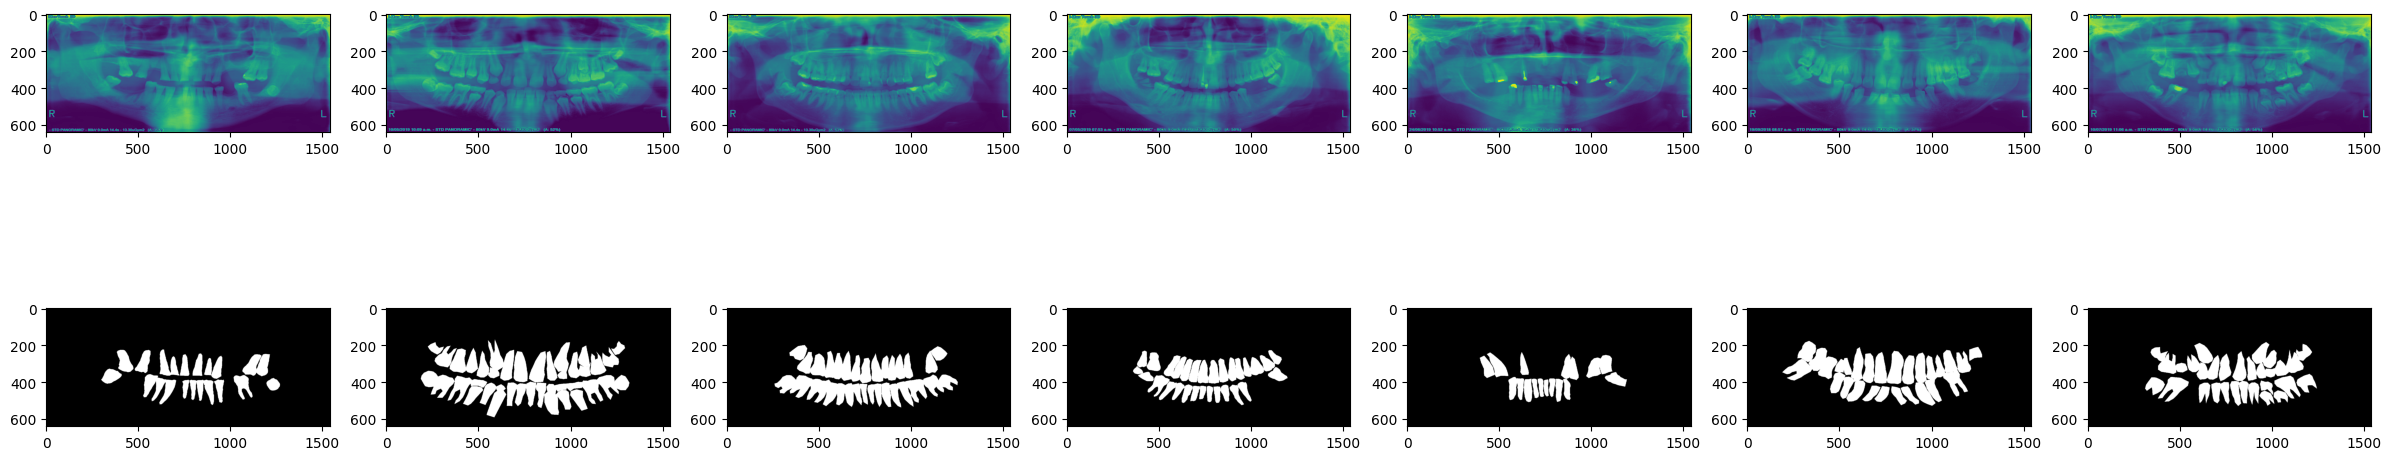

In [21]:
fig = plt.figure(figsize = (30,7))
for index in range(7):
  file_path1 = os.path.join('/kaggle/working/img_png', str(index+1)+'.png')
  file_path2 = os.path.join('/kaggle/working/mask_bw', str(index+1)+'.png')
  # print(file_path2)
  ax = fig.add_subplot(2, 7, index+1)
  plt.imshow(pre_images((1540,640),file_path1))  #show result of converting every img to one color channel
  # plt.imshow(cv2.imread(file_path1))

  ax = fig.add_subplot(2, 7, index+8)
  plt.imshow(resize((1540,640),file_path2))
  # plt.imshow(cv2.imread(file_path2))
plt.show()

In [22]:
folder_name = "data"

path = "/kaggle/working/" + folder_name

os.makedirs(path, exist_ok=True)

In [23]:
arr1=np.arange(1,599)
print(arr1.dtype)
arr1=arr1.astype(str)
print(type(arr1))
df=pd.DataFrame(arr1)
df[1]=df[0]
df[0]=df[0]+'.png'
df.to_csv('/kaggle/working/data/sample.csv',index=False)

int64
<class 'numpy.ndarray'>


In [24]:
folder_name = "original_img"

path = "/kaggle/working/data/" + folder_name

os.makedirs(path, exist_ok=True)

In [25]:
folder='/kaggle/working/mask_bw'
for file_name in os.listdir(folder):
    source = folder+'/'+file_name
    # print(source)

    destination = source.replace('.png','_m.png')
    # print(destination)
    # Renaming the file
    os.rename(source, destination)

In [26]:
import shutil
source_folder = "/kaggle/working/img_png"
destination_folder = "/kaggle/working/data/original_img"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over files in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is an image file (you may need to adjust this condition based on your file extensions)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Construct the full path of the source file
        source_file_path = os.path.join(source_folder, filename)
        # Construct the full path of the destination file
        destination_file_path = os.path.join(destination_folder, filename)
        # Copy the file from the source folder to the destination folder
        shutil.copy2(source_file_path, destination_file_path)

In [27]:
import shutil
source_folder = "/kaggle/working/mask_bw"
destination_folder = "/kaggle/working/data/original_img"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over files in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is an image file (you may need to adjust this condition based on your file extensions)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Construct the full path of the source file
        source_file_path = os.path.join(source_folder, filename)
        # Construct the full path of the destination file
        destination_file_path = os.path.join(destination_folder, filename)
        # Copy the file from the source folder to the destination folder
        shutil.copy2(source_file_path, destination_file_path)

In [28]:
files =  os.listdir('/kaggle/working/data/original_img')
sorted_files = sorted(files)
print(len(sorted_files))

1196


In [42]:
rest_set_size = 0.3
test_set_size = 0.5
class dset(Dataset):
    def __init__(self, root_dir, train=True,test=True,transformX = None, transformY = None):
        self.pixel_file = pd.read_csv(os.path.join(root_dir, 'sample.csv'))
        self.root_dir = root_dir
        self.transformX = transformX
        self.transformY = transformY
        self.train = train
        self.test = test

        # split the dataset to train and rest
        # split the rest to validation and test
        self.train_data, self.rest_data = train_test_split(self.pixel_file, test_size = rest_set_size, random_state = 5)
        self.validation_data, self.test_data = train_test_split(self.rest_data, test_size = test_set_size, random_state = 5)

    def __len__(self):
        if self.train:
          length = len(self.train_data)
        elif self.test:
          length = len(self.test_data)
        else:
          length = len(self.validation_data)
        return length

    def __getitem__(self, index):
        if self.train:
          imx_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0].replace('.png','_m.png'))
        elif self.test:
          imx_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0].replace('.png','_m.png'))
        else:
          imx_name = os.path.join(self.root_dir, 'original_img', self.validation_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.validation_data.iloc[index, 0].replace('.png','_m.png'))

        
        imx = Image.open(imx_name)
        imy = Image.open(imy_name).convert('L')
        

        ##data augmentation
#         if self.train:
          #Random horizontal flipping
#           if random.random() > 0.5:
#               imx = TF.hflip(imx)
              
#               imy = TF.hflip(imy)
              
            

#           #Random vertical flipping
#           if random.random() > 0.5:
#               imx = TF.vflip(imx)
#               imy = TF.vflip(imy)

#           #Random rotation
#           if random.random() > 0.8:
#             angle = random.choice([-30, -90, -60, -45 -15, 0, 15, 30, 45, 60, 90])
#             imx = TF.rotate(imx, angle)
#             imy = TF.rotate(imy, angle)

        if self.transformX:
            imx = self.transformX(imx)
            imy = self.transformY(imy)
            

        sample = {'image': imx, 'annotation': imy}
        return sample

In [43]:
tx_X = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                              ])
tx_Y = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor()
                              ])
train_data = dset('/kaggle/working/data', train=True, test=False, transformX = tx_X, transformY = tx_Y)
validation_data = dset('/kaggle/working/data', train=False,test=False,transformX = tx_X, transformY = tx_Y)
test_data = dset('/kaggle/working/data', train=False, test=True,transformX = tx_X, transformY = tx_Y)

train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True, num_workers=2)
validation_loader = DataLoader(dataset=validation_data, batch_size=5, shuffle=True, num_workers=1)
test_loader = DataLoader(dataset=test_data, batch_size=5, shuffle=True, num_workers=1)

In [44]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

84
18
18


tensor([[[ 0.0745,  0.1451,  0.1294,  ...,  0.1294,  0.1451,  0.0745],
         [ 0.9765,  0.9922,  0.9529,  ...,  0.9529,  0.9765,  0.9765],
         [ 0.9843,  0.9843,  0.9529,  ...,  0.9529,  0.9686,  1.0000],
         ...,
         [-0.8667, -0.9765, -0.9765,  ..., -0.9294, -0.8275, -0.6314],
         [-0.8353, -0.9686, -0.9686,  ..., -0.9294, -0.8275, -0.6157],
         [-0.8588, -0.9451, -0.9608,  ..., -0.8980, -0.8275, -0.7176]]])


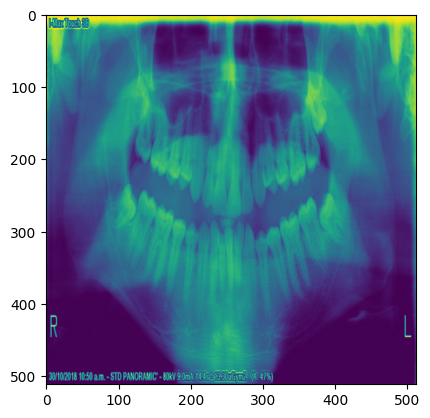

In [45]:
print(train_data[1]['image'])
plt.imshow(train_data[1]['image'].squeeze(0))

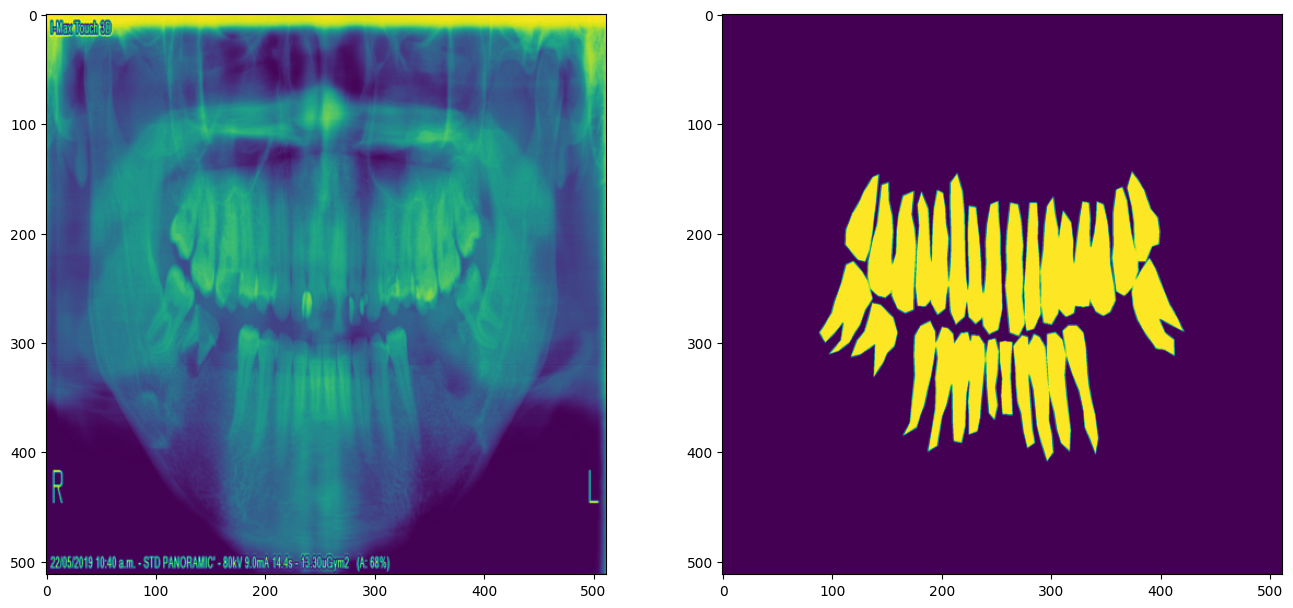

In [46]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(2, 2, 1)
plt.imshow(train_data[4]['image'].squeeze(0))
ax = fig.add_subplot(2, 2, 2)
plt.imshow(train_data[4]['annotation'].squeeze(0))
plt.show()

In [48]:
class res_conv(nn.Module):
    def __init__(self, input_channels, output_channels, down=True):
        super(res_conv, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=1),
                                   nn.BatchNorm2d(output_channels),
                                   nn.LeakyReLU(inplace = True),
                                   nn.Dropout(0.1),
                                 )
        self.conv2 = nn.Sequential(nn.Conv2d(output_channels, output_channels, kernel_size=3, padding=1),
                                   nn.BatchNorm2d(output_channels),
                                   nn.LeakyReLU(inplace = True),
                                   nn.Dropout(0.1),
                                  )
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x1)+x1
        return x2

class start_conv(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(start_conv, self).__init__()
        self.conv = res_conv(input_channels, output_channels)

    def forward(self, x):
        x = self.conv(x)
        return x


class down_conv(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(down_conv, self).__init__()
        self.conv = nn.Sequential(nn.MaxPool2d(2),
                                  res_conv(input_channels, output_channels),)
    def forward(self,x):
        x = self.conv(x)
        return x

class up_conv(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(up_conv, self).__init__()
        self.up = nn.ConvTranspose2d(input_channels//2, input_channels//2, kernel_size=2, stride=2)
        self.conv = res_conv(input_channels, output_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diff1 = x2.shape[2]-x1.shape[2]
        diff2 = x2.shape[3]-x1.shape[3]
        x1 = F.pad(x1, pad=(diff1//2, diff1-diff1//2, diff2//2, diff2-diff2//2))
        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class stop_conv(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(stop_conv, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(input_channels, output_channels, kernel_size=1),
                                 nn.Sigmoid())

    def forward(self, x):
        x = self.conv(x)
        return x

class ResUnet(nn.Module):
    def __init__(self):
        super(ResUnet, self).__init__()
        self.inc = start_conv(1, 64)
        self.down1 = down_conv(64, 128)
        self.down2 = down_conv(128, 256)
        self.down3 = down_conv(256, 512)
        self.down4 = down_conv(512, 512)
        self.up1 = up_conv(1024, 256)
        self.up2 = up_conv(512, 128)
        self.up3 = up_conv(256, 64)
        self.up4 = up_conv(128, 64)
        self.outc = stop_conv(64, 1)

    def forward(self, x):
        xin = self.inc(x)
        xd1 = self.down1(xin)
        xd2 = self.down2(xd1)
        xd3 = self.down3(xd2)
        xd4 = self.down4(xd3)
        xu1 = self.up1(xd4, xd3)
        xu2 = self.up2(xu1, xd2)
        xu3 = self.up3(xu2, xd1)
        xu4 = self.up4(xu3, xin)
        out = self.outc(xu4)
        return out

In [49]:
model = ResUnet()
if torch.cuda.is_available():
    model = model.to('cuda')

In [50]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.000006)

In [51]:
criterion = nn.BCELoss()
train_hist, val_hist = None, None

In [52]:
def dice_index(y_pred, y_actual):
    smooth = 0.000001
    size_of_batch = y_pred.size(0)

    p1 = y_pred.view(size_of_batch, -1)
    p2 = y_actual.view(size_of_batch, -1)

    intersection = (p1 * p2).sum()

    dice =  ((2.0 * intersection )+ smooth) / (p1.sum() + p2.sum() + smooth)

    return dice

def dice_loss(y_predict, y_train): ## to add in bce looss
  dice_loss = 1 -(dice_index(y_predict, y_train))
  return dice_loss

In [53]:
from tqdm.notebook import tqdm
def train(model, criterion, epochs = 5, verbose=False, train_hist=None, val_hist=None):
  if not train_hist:
    train_hist = []
  if not val_hist:
    val_hist = []

  torch.cuda.empty_cache()

  tqdm.write("====== Training Started ======")
  epochs_completed = 0
  try:
    for e in tqdm(range(epochs), position=0, desc="Epochs", leave=False, colour='green'):
      train_running_loss = 0.0
      validation_running_loss = 0.0
      ct = 0.0

      model.train()

      # print("Losses are reset to:", train_running_loss, validation_running_loss, ct)
      for ith_batch, sample in tqdm(enumerate(train_loader), position=1, desc="Batches", leave=False, total=len(train_loader), colour='blue'):
        X, Y = sample['image'], sample['annotation']
      #   plt.imshow(pred.detach().numpy()[0].transpose(1, 2, 0))

        if torch.cuda.is_available():
          X = X.to('cuda')
          Y = Y.to('cuda')

        y_pred = model(X)
      # out = (y_pred + 0.5).int().float()

        # loss = criterion(y_pred, Y) #* 0.70 + 0.30 * dice_loss(y_pred, y_train)
        loss=0.3*dice_loss(y_pred, Y)+0.7*criterion(y_pred, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if verbose and ith_batch % 10 == 0 and ith_batch != 0:
          # print("This item's loss:", f'{loss.item()}')
          # print("This pred started with", y_pred[0][0][0][0:10])
          tqdm.write('Epoch: ', e + 1, 'Batch: ', ith_batch, 'Curr Epoch Loss: ', f'{train_running_loss / ct:0.3f}')

        train_running_loss += loss.item()
        train_hist.append(loss.item())
        ct += 1.0

      with torch.no_grad():

        model.eval()

        for ith_batch, sample in enumerate(validation_loader):
            X_val, y_val = sample['image'], sample['annotation']

            if torch.cuda.is_available():
              X_val = X_val.to('cuda')
              y_val = y_val.to('cuda')

            y_out = model(X_val)

            # print("Pred is", y_out[y_out.shape[0]//2,y_out.shape[1]//2-1:y_out.shape[1]//2+1])
            val_loss = criterion(y_out, y_val)

            validation_running_loss += val_loss.item()
            val_hist.append(val_loss.item())

      train_epoch_loss = train_running_loss / len(train_loader)
      validation_epoch_loss = validation_running_loss / len(validation_loader)

      if verbose:
        tqdm.write("================================================================================")
        tqdm.write("Epoch {} completed".format(e + 1))
        tqdm.write("Average train loss is {:0.3f}: ".format(train_epoch_loss))
        tqdm.write("Average validation loss is {:0.3f}".format(validation_epoch_loss))
        tqdm.write("================================================================================")
      else:
        tqdm.write(f"Epoch {e + 1}. Train Loss: {train_epoch_loss:0.4f} Val Loss: {validation_epoch_loss:0.4f}")
      epochs_completed = e + 1
      torch.cuda.empty_cache()
  except Exception as e:
    print("Exception:", e)
    print("Halting training and returning historical loss data")
  return train_hist, val_hist, epochs_completed

In [54]:
total_epochs=0

In [55]:
num_epochs = 150
# Including train_hist, val_hist in our parameters allows us to retain our previously saved loss data
# and visualize the full training graph
train_hist, val_hist, completed_epochs = train(model, criterion, epochs=num_epochs, verbose=False, train_hist=train_hist, val_hist=val_hist)
total_epochs+=completed_epochs

====== Training Started ======


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 1. Train Loss: 0.6233 Val Loss: 0.4327


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 2. Train Loss: 0.4963 Val Loss: 0.3853


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 3. Train Loss: 0.3884 Val Loss: 0.3506


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 4. Train Loss: 0.3331 Val Loss: 0.3112


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 5. Train Loss: 0.2903 Val Loss: 0.2991


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 6. Train Loss: 0.2617 Val Loss: 0.2750


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 7. Train Loss: 0.2409 Val Loss: 0.2420


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 8. Train Loss: 0.2276 Val Loss: 0.2304


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 9. Train Loss: 0.2184 Val Loss: 0.2136


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 10. Train Loss: 0.2078 Val Loss: 0.2122


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 11. Train Loss: 0.2026 Val Loss: 0.2088


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 12. Train Loss: 0.1964 Val Loss: 0.2001


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 13. Train Loss: 0.1905 Val Loss: 0.1901


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 14. Train Loss: 0.1880 Val Loss: 0.1947


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 15. Train Loss: 0.1841 Val Loss: 0.1774


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 16. Train Loss: 0.1806 Val Loss: 0.1636


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 17. Train Loss: 0.1752 Val Loss: 0.1678


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 18. Train Loss: 0.1732 Val Loss: 0.1548


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 19. Train Loss: 0.1690 Val Loss: 0.1570


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 20. Train Loss: 0.1662 Val Loss: 0.1498


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 21. Train Loss: 0.1636 Val Loss: 0.1487


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 22. Train Loss: 0.1607 Val Loss: 0.1433


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 23. Train Loss: 0.1597 Val Loss: 0.1453


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 24. Train Loss: 0.1579 Val Loss: 0.1516


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 25. Train Loss: 0.1539 Val Loss: 0.1381


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 26. Train Loss: 0.1519 Val Loss: 0.1372


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 27. Train Loss: 0.1502 Val Loss: 0.1337


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 28. Train Loss: 0.1468 Val Loss: 0.1420


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 29. Train Loss: 0.1443 Val Loss: 0.1276


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 30. Train Loss: 0.1434 Val Loss: 0.1318


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 31. Train Loss: 0.1418 Val Loss: 0.1260


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 32. Train Loss: 0.1395 Val Loss: 0.1254


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 33. Train Loss: 0.1384 Val Loss: 0.1261


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 34. Train Loss: 0.1367 Val Loss: 0.1213


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 35. Train Loss: 0.1361 Val Loss: 0.1198


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 36. Train Loss: 0.1351 Val Loss: 0.1170


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 37. Train Loss: 0.1341 Val Loss: 0.1151


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 38. Train Loss: 0.1308 Val Loss: 0.1169


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 39. Train Loss: 0.1294 Val Loss: 0.1167


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 40. Train Loss: 0.1286 Val Loss: 0.1144


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 41. Train Loss: 0.1275 Val Loss: 0.1119


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 42. Train Loss: 0.1261 Val Loss: 0.1095


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 43. Train Loss: 0.1247 Val Loss: 0.1109


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 44. Train Loss: 0.1224 Val Loss: 0.1103


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 45. Train Loss: 0.1213 Val Loss: 0.1105


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 46. Train Loss: 0.1203 Val Loss: 0.1113


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 47. Train Loss: 0.1197 Val Loss: 0.1096


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 48. Train Loss: 0.1187 Val Loss: 0.1086


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 49. Train Loss: 0.1173 Val Loss: 0.1068


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 50. Train Loss: 0.1155 Val Loss: 0.1069


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 51. Train Loss: 0.1149 Val Loss: 0.1047


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 52. Train Loss: 0.1151 Val Loss: 0.1063


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 53. Train Loss: 0.1129 Val Loss: 0.1055


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 54. Train Loss: 0.1123 Val Loss: 0.1044


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 55. Train Loss: 0.1114 Val Loss: 0.1033


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 56. Train Loss: 0.1102 Val Loss: 0.1027


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 57. Train Loss: 0.1095 Val Loss: 0.1009


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 58. Train Loss: 0.1079 Val Loss: 0.1025


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 59. Train Loss: 0.1076 Val Loss: 0.1051


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 60. Train Loss: 0.1066 Val Loss: 0.1036


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 61. Train Loss: 0.1062 Val Loss: 0.1004


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 62. Train Loss: 0.1051 Val Loss: 0.1012


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 63. Train Loss: 0.1033 Val Loss: 0.1006


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 64. Train Loss: 0.1030 Val Loss: 0.1018


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 65. Train Loss: 0.1016 Val Loss: 0.0985


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 66. Train Loss: 0.1011 Val Loss: 0.1003


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 67. Train Loss: 0.1006 Val Loss: 0.0996


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 68. Train Loss: 0.0994 Val Loss: 0.1018


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 69. Train Loss: 0.0985 Val Loss: 0.0971


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 70. Train Loss: 0.0990 Val Loss: 0.0992


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 71. Train Loss: 0.0976 Val Loss: 0.0985


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 72. Train Loss: 0.0969 Val Loss: 0.0956


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 73. Train Loss: 0.0962 Val Loss: 0.0971


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 74. Train Loss: 0.0957 Val Loss: 0.0993


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 75. Train Loss: 0.0948 Val Loss: 0.0998


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 76. Train Loss: 0.0938 Val Loss: 0.0992


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 77. Train Loss: 0.0934 Val Loss: 0.0983


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 78. Train Loss: 0.0933 Val Loss: 0.0952


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 79. Train Loss: 0.0925 Val Loss: 0.0969


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 80. Train Loss: 0.0912 Val Loss: 0.0966


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 81. Train Loss: 0.0914 Val Loss: 0.0979


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 82. Train Loss: 0.0900 Val Loss: 0.0967


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 83. Train Loss: 0.0893 Val Loss: 0.0969


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 84. Train Loss: 0.0891 Val Loss: 0.0967


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 85. Train Loss: 0.0880 Val Loss: 0.0958


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 86. Train Loss: 0.0881 Val Loss: 0.0947


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 87. Train Loss: 0.0872 Val Loss: 0.0970


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 88. Train Loss: 0.0865 Val Loss: 0.0958


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 89. Train Loss: 0.0865 Val Loss: 0.0967


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 90. Train Loss: 0.0851 Val Loss: 0.0945


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 91. Train Loss: 0.0848 Val Loss: 0.0957


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 92. Train Loss: 0.0847 Val Loss: 0.0942


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 93. Train Loss: 0.0841 Val Loss: 0.0977


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 94. Train Loss: 0.0832 Val Loss: 0.0955


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 95. Train Loss: 0.0834 Val Loss: 0.0977


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 96. Train Loss: 0.0826 Val Loss: 0.0974


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 97. Train Loss: 0.0823 Val Loss: 0.0959


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 98. Train Loss: 0.0816 Val Loss: 0.0943


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 99. Train Loss: 0.0809 Val Loss: 0.0978


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 100. Train Loss: 0.0808 Val Loss: 0.0957


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 101. Train Loss: 0.0800 Val Loss: 0.0972


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 102. Train Loss: 0.0799 Val Loss: 0.0951


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 103. Train Loss: 0.0786 Val Loss: 0.0981


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 104. Train Loss: 0.0782 Val Loss: 0.0959


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 105. Train Loss: 0.0782 Val Loss: 0.0958


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 106. Train Loss: 0.0777 Val Loss: 0.0999


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 107. Train Loss: 0.0769 Val Loss: 0.0944


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 108. Train Loss: 0.0768 Val Loss: 0.0959


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 109. Train Loss: 0.0763 Val Loss: 0.0989


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 110. Train Loss: 0.0763 Val Loss: 0.1013


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 111. Train Loss: 0.0762 Val Loss: 0.0982


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 112. Train Loss: 0.0751 Val Loss: 0.0955


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 113. Train Loss: 0.0744 Val Loss: 0.0980


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 114. Train Loss: 0.0740 Val Loss: 0.0979


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 115. Train Loss: 0.0750 Val Loss: 0.0968


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 116. Train Loss: 0.0744 Val Loss: 0.1000


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 117. Train Loss: 0.0734 Val Loss: 0.0969


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 118. Train Loss: 0.0728 Val Loss: 0.1009


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 119. Train Loss: 0.0727 Val Loss: 0.0960


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 120. Train Loss: 0.0721 Val Loss: 0.0963


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 121. Train Loss: 0.0719 Val Loss: 0.0969


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 122. Train Loss: 0.0713 Val Loss: 0.0971


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 123. Train Loss: 0.0712 Val Loss: 0.0991


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 124. Train Loss: 0.0706 Val Loss: 0.0986


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 125. Train Loss: 0.0704 Val Loss: 0.0967


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 126. Train Loss: 0.0697 Val Loss: 0.1002


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 127. Train Loss: 0.0698 Val Loss: 0.0968


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 128. Train Loss: 0.0692 Val Loss: 0.0993


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 129. Train Loss: 0.0690 Val Loss: 0.0977


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 130. Train Loss: 0.0689 Val Loss: 0.0961


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 131. Train Loss: 0.0684 Val Loss: 0.0975


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 132. Train Loss: 0.0682 Val Loss: 0.1000


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 133. Train Loss: 0.0678 Val Loss: 0.1011


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 134. Train Loss: 0.0674 Val Loss: 0.0983


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 135. Train Loss: 0.0674 Val Loss: 0.1009


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 136. Train Loss: 0.0668 Val Loss: 0.0992


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 137. Train Loss: 0.0665 Val Loss: 0.0979


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 138. Train Loss: 0.0662 Val Loss: 0.1027


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 139. Train Loss: 0.0659 Val Loss: 0.0983


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 140. Train Loss: 0.0661 Val Loss: 0.0995


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 141. Train Loss: 0.0654 Val Loss: 0.0999


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 142. Train Loss: 0.0656 Val Loss: 0.1013


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 143. Train Loss: 0.0651 Val Loss: 0.0985


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 144. Train Loss: 0.0646 Val Loss: 0.0997


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 145. Train Loss: 0.0645 Val Loss: 0.1002


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 146. Train Loss: 0.0638 Val Loss: 0.0975


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 147. Train Loss: 0.0637 Val Loss: 0.1010


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 148. Train Loss: 0.0635 Val Loss: 0.0988


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 149. Train Loss: 0.0630 Val Loss: 0.0992


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

Epoch 150. Train Loss: 0.0631 Val Loss: 0.0993


In [56]:
def im_converterX(tensor):
    image = tensor.cpu().clone().detach().numpy() 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
    # print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # unnormalizing the image # this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterX1(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image=image.squeeze(0) 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
 # print(image.shape)
    # image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # unnormalizing the image # this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterY(tensor):
    image = tensor.cpu().clone().detach().numpy() 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
    # print(image.shape)
    image = image * np.array((1, 1, 1)) # unnormalizing the image  not needed# this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

def im_converterY1(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image=image.squeeze(0) 
    image = image.transpose(1,2,0) # swapping axes making (1, 28, 28) image to a (28, 28, 1)
 # print(image.shape)
    image = image * np.array((1, 1, 1)) # unnormalizing the image  not needed# this also outputs (28, 28, 3) which seems important for plt.imshow
    image = image.clip(0, 1) # to make sure final values are in range 0 to 1 as .ToTensor outputed
    return image

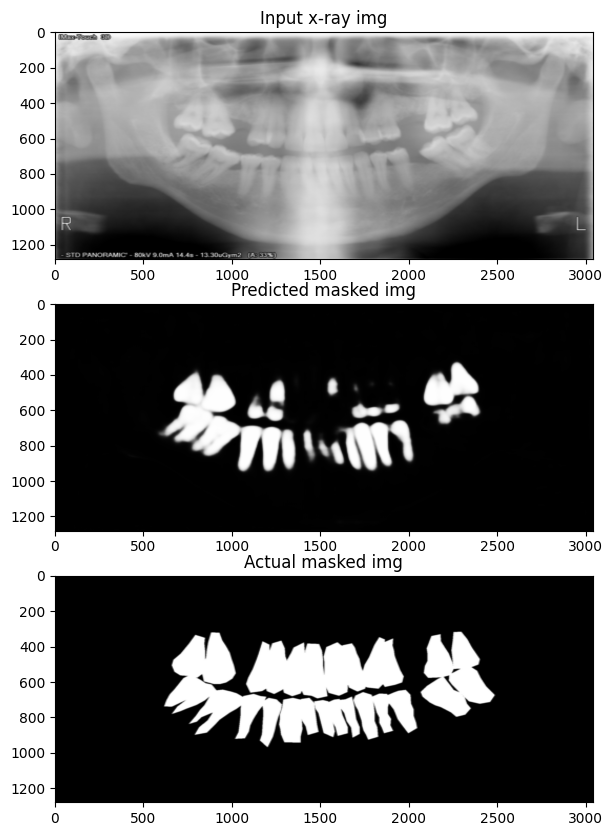

In [57]:
pig = plt.figure(figsize = (16, 10))
dim=3040,1280
for i, sample in enumerate(validation_loader):
    Xs, Ys = sample["image"], sample["annotation"]
    
    a = pig.add_subplot(3, 1, 1)
    imgx=im_converterX(Xs[0])
    imgx=cv2.resize(imgx, dim, interpolation = cv2.INTER_AREA)
    plt.title('Input x-ray img')
    plt.imshow(imgx)

    Xs = Xs.to("cuda")
    a = pig.add_subplot(3, 1, 2)
    output_img=im_converterY(model(Xs)[0])
    output_img=cv2.resize(output_img, dim, interpolation = cv2.INTER_AREA)
    plt.title('Predicted masked img')
    plt.imshow(output_img)

    a = pig.add_subplot(3, 1, 3)
    imgy=im_converterY(Ys[0])
    imgy=cv2.resize(imgy, dim, interpolation = cv2.INTER_AREA)
    plt.title('Actual masked img')
    plt.imshow(imgy)

    break
plt.show()

In [58]:
train_means, val_means = [], []
def plot_loss(title="Without Data Augmentation", ylabel="Loss", xlabel="Epochs"):
    for i in range(total_epochs):
        train_means.append(np.mean(train_hist[len(train_loader)*i:len(train_loader)*(i+1)]))
        val_means.append(np.mean(val_hist[len(validation_loader)*i:len(validation_loader)*(i+1)]))
    plt.plot(train_means, label = 'Train Loss')
    plt.plot(val_means, label = 'Validation Loss')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()

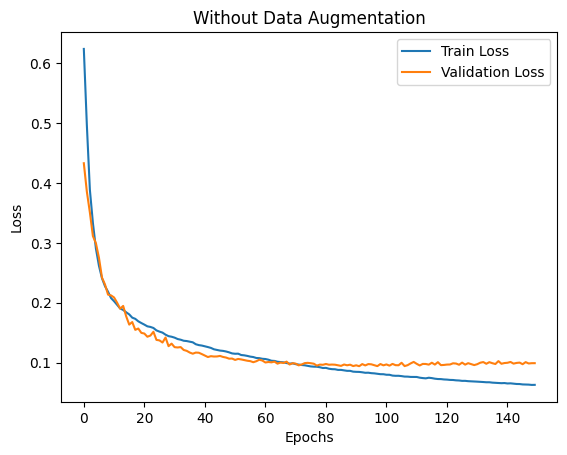

In [59]:
plot_loss()

In [60]:
print(min(train_means))

0.06299222300627402


In [61]:
torch.save(model.state_dict(),'/kaggle/working/best_unet_01062024_v2.pth')

In [62]:
test_set_size = 0.5
class dset(Dataset):
    def __init__(self, root_dir, train=True,test=True,transformX = None, transformY = None):
        self.pixel_file = pd.read_csv(os.path.join(root_dir, 'sample.csv'))
        self.root_dir = root_dir
        self.transformX = transformX
        self.transformY = transformY
        self.train = train
        self.test = test
        
        # split the dataset to train and rest
        # split the rest to validation and test
        self.train_data, self.test_data = train_test_split(self.pixel_file, test_size = test_set_size, random_state = 5)
        # self.validation_data, self.test_data = train_test_split(self.rest_data, test_size = test_set_size, random_state = 5)

    def __len__(self):
        if self.train:
          length = len(self.train_data)
        elif self.test:
          length = len(self.test_data)
        else:
          length = len(self.validation_data)
        return length
    
    def __getitem__(self, index):
        if self.train:
          imx_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.train_data.iloc[index, 0].replace('.png','_m.png'))
        elif self.test:
          imx_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.test_data.iloc[index, 0].replace('.png','_m.png'))
        else:
          imx_name = os.path.join(self.root_dir, 'original_img', self.validation_data.iloc[index, 0])
          imy_name = os.path.join(self.root_dir, 'original_img',self.validation_data.iloc[index, 0].replace('.png','_m.png'))
        
        imx = Image.open(imx_name)
        imy = Image.open(imy_name).convert('L')

        if self.transformX:
            imx = self.transformX(imx)
            imy = self.transformY(imy)
      
        sample = {'image': imx, 'annotation': imy}
        return sample

In [63]:
tx_X = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor(),
                           transforms.Normalize((0.5,), (0.5,))
                              ])
tx_Y = transforms.Compose([ transforms.Resize((512, 512)),
                              transforms.ToTensor()
                              ])
train_data = dset('/kaggle/working/data', train=True, test=False, transformX = tx_X, transformY = tx_Y)
# validation_data = dset('/content/data', train=False,test=False,transformX = tx_X, transformY = tx_Y)
test_data = dset('/kaggle/working/data', train=False, test=True,transformX = tx_X, transformY = tx_Y)

train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True, num_workers=2)
# validation_loader = DataLoader(dataset=validation_data, batch_size=2, shuffle=True, num_workers=1)
test_loader = DataLoader(dataset=test_data, batch_size=5, shuffle=True, num_workers=1)

In [64]:
def avg_dice_index(dataloader): 
    dice = 0.0
    model.eval()
    with torch.no_grad():
        for ith_batch, sample_batched in enumerate(dataloader):
  
            X_train = sample_batched['image'].to('cuda')
            y_train = sample_batched['annotation'].to('cuda')
            
            y_predict = (model(X_train) + 0.5).int().float()
            
            dice += dice_index(y_predict, y_train)
            
    print(len(dataloader))
    avg_dice = dice / len(dataloader)
    
    return avg_dice.item()

In [65]:
test_score=avg_dice_index(test_loader)

60


In [66]:
print('Avergae Dice Score is:',test_score)
print('Avergae Dice Loss is:',1-test_score)

Avergae Dice Score is: 0.9039711356163025
Avergae Dice Loss is: 0.09602886438369751


0


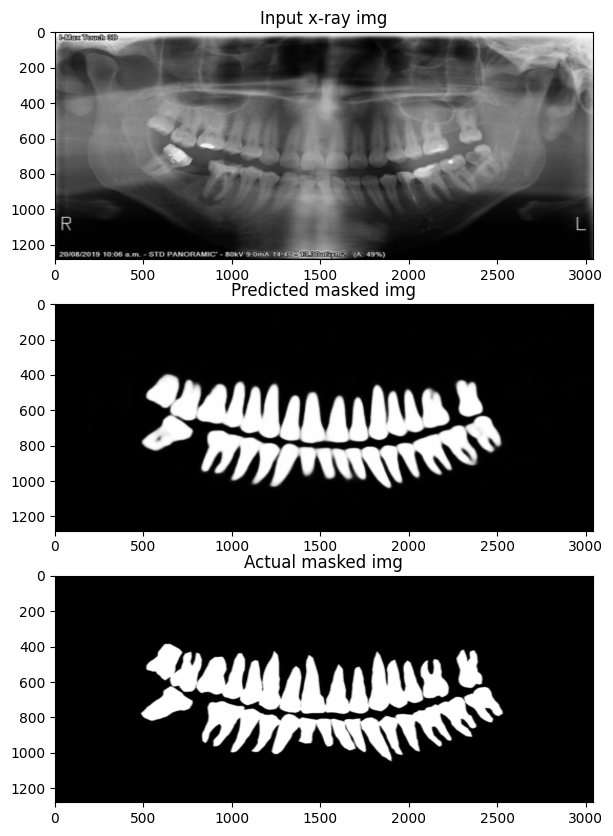

In [70]:
pig = plt.figure(figsize = (16, 10))
dim=3040,1280

for i, sample in enumerate(test_loader):
    print(i)
    Xs, Ys = sample["image"], sample["annotation"]
    
    a = pig.add_subplot(3, 1, 1)
    imgx=im_converterX(Xs[0])
    imgx=cv2.resize(imgx, dim, interpolation = cv2.INTER_AREA)
    plt.title('Input x-ray img')
    plt.imshow(imgx)

    Xs = Xs.to("cuda")
    a = pig.add_subplot(3, 1, 2)
    output_img=im_converterY(model(Xs)[0])
    output_img=cv2.resize(output_img, dim, interpolation = cv2.INTER_AREA)
    plt.title('Predicted masked img')
    plt.imshow(output_img)

    a = pig.add_subplot(3, 1, 3)
    imgy=im_converterY(Ys[0])
    imgy=cv2.resize(imgy, dim, interpolation = cv2.INTER_AREA)
    plt.title('Actual masked img')
    plt.imshow(imgy)

    break
plt.show()